# **EDA - 1**

In [319]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [321]:
df = pd.read_csv("https://raw.githubusercontent.com/chaitanya-0b10/Assignment-EDA/refs/heads/main/BIKE%20DETAILS%20(1).csv")

In [323]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [325]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [327]:
# Q1. What is the range of selling prices in the dataset
selling_price_range = df['selling_price'].min(), df['selling_price'].max()
selling_price_range



(5000, 760000)

In [329]:
#Q2. What is the median selling price for bikes in the dataset
median_selling_price = df['selling_price'].median()
median_selling_price

45000.0

In [331]:
#3.What is the most common seller type
most_common_seller_type = df['seller_type'].mode()[0]
most_common_seller_type

'Individual'

In [333]:
#Q4. How many bikes have driven more than 50,000 kilometers
bikes_over_50k_km = df[df['km_driven'] > 50000]
num_bikes_over_50k_km = len(bikes_over_50k_km)

print(f"Number of bikes driven more than 50,000 kilometers: {num_bikes_over_50k_km}")

Number of bikes driven more than 50,000 kilometers: 170


 5. What is the average km_driven value for each ownership type

In [336]:
#Q5. What is the average km_driven value for each ownership type
average_km_driven_by_ownership = df.groupby('owner')['km_driven'].mean()

average_km_driven_by_ownership

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [338]:
#Q6. What proportion of bikes are from the year 2015 or older
proportion_2015_or_older = len(df[df['year'] <= 2015]) / len(df)
print(f"Proportion of bikes from 2015 or older: {proportion_2015_or_older}")

Proportion of bikes from 2015 or older: 0.5664467483506126


7.

name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


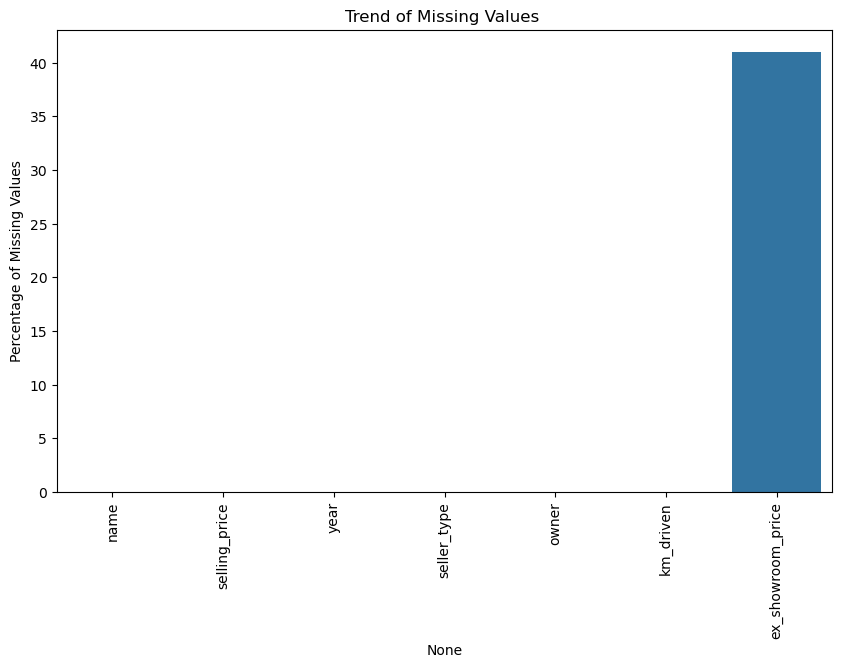

In [341]:
#Q7.  What is the trend of missing values across the dataset
missing_values_trend = df.isnull().sum() / len(df) * 100
print(missing_values_trend)
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_trend.index, y=missing_values_trend.values)
plt.xticks(rotation=90)
plt.ylabel("Percentage of Missing Values")
plt.title("Trend of Missing Values ")
plt.show()

In [343]:
#Q8 What is the highest ex_showroom_price recorded, and for which bike
highest_ex_showroom_price = df['ex_showroom_price'].max()
bike_with_highest_ex_showroom_price = df.loc[df['ex_showroom_price'] == highest_ex_showroom_price, 'name'].iloc[0]
print(f"Highest ex_showroom_price: {highest_ex_showroom_price}, Bike: {bike_with_highest_ex_showroom_price}")


Highest ex_showroom_price: 1278000.0, Bike: Harley-Davidson Street Bob


In [345]:

#Q9 What is the total number of bikes listed by each seller type
bike_count_by_seller_type = df.groupby('seller_type')['name'].count()
print("\nTotal number of bikes listed by each seller type:")
print(bike_count_by_seller_type)


Total number of bikes listed by each seller type:
seller_type
Dealer           6
Individual    1055
Name: name, dtype: int64


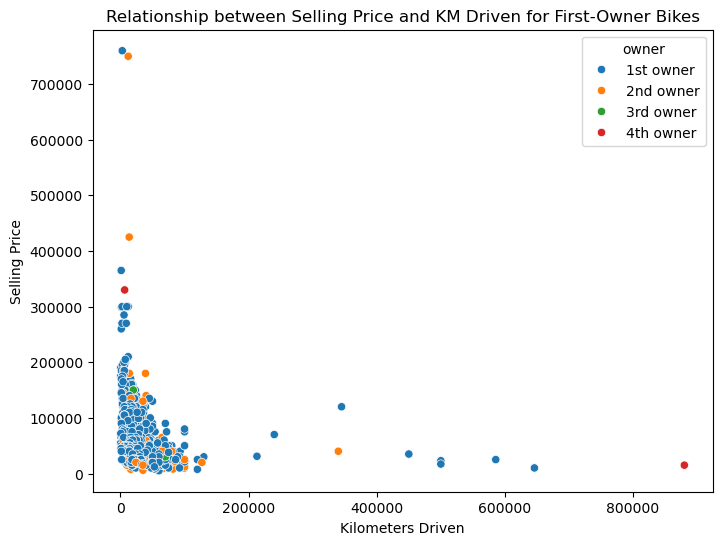

In [347]:
# Q10 What is the relationship between selling_price and km_driven for first-owner bikes

plt.figure(figsize=(8, 6))
sns.scatterplot(x='km_driven', y='selling_price', hue='owner', data=df)
plt.title('Relationship between Selling Price and KM Driven for First-Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

In [349]:
#Q11 Identify and remove outliers in the km_driven column using the IQR method

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print(f"Number of outliers removed: {len(df) - len(df_no_outliers)}")

Number of outliers removed: 39


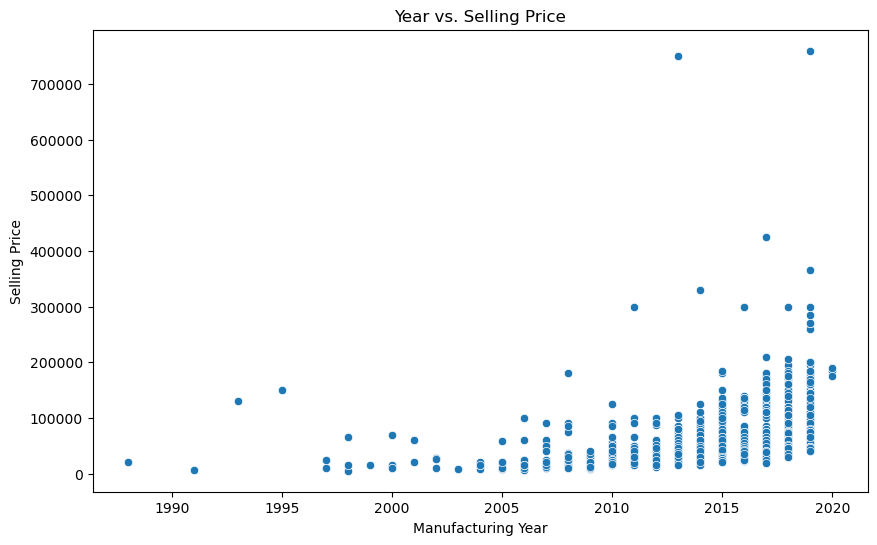

In [179]:
#Q12 Perform a bivariate analysis to visualize the relationship between year and selling_price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Year vs. Selling Price')
plt.xlabel('Manufacturing Year')
plt.ylabel('Selling Price')
plt.show()


In [181]:

#Q13 What is the average depreciation in selling price based on the bike's age
df['bike_age'] = 2024 - df['year'] # Assuming current year is 2024
average_depreciation_by_age = df.groupby('bike_age')['selling_price'].mean()
print("\nAverage depreciation in selling price based on bike age:")
print(average_depreciation_by_age)



Average depreciation in selling price based on bike age:
bike_age
4     183333.333333
5     119689.511628
6      87660.374046
7      78894.736842
8      58469.018692
9      56500.000000
10     48668.131868
11     51136.986301
12     35748.400000
13     35655.721311
14     31793.333333
15     22267.857143
16     34289.285714
17     24927.586207
18     23380.000000
19     16978.571429
20     15100.000000
21      8000.000000
22     20666.666667
23     40000.000000
24     20833.333333
25     15000.000000
26     28333.333333
27     17500.000000
29    150000.000000
31    130000.000000
33      6000.000000
36     20000.000000
Name: selling_price, dtype: float64


In [351]:
#Q14 Which bike names are priced significantly above the average price for their manufacturing year
average_price_by_year = df.groupby('year')['selling_price'].mean()
df['average_price_for_year'] = df['year'].map(average_price_by_year)
significantly_priced_bikes = df[df['selling_price'] > df['average_price_for_year'] * 1.5] 
print("\nBikes priced significantly above average for their year:")
print(significantly_priced_bikes[['name', 'year', 'selling_price', 'average_price_for_year']])


Bikes priced significantly above average for their year:
                                     name  year  selling_price  \
2     Royal Enfield Classic Gunmetal Grey  2018         150000   
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                          Yamaha YZF R3  2019         365000   
18    Royal Enfield Classic Gunmetal Grey  2018         150000   
23                          Jawa Standard  2019         180000   
..                                    ...   ...            ...   
979             Royal Enfield Thunder 500  2015         105000   
981             Royal Enfield Thunder 350  2013         105000   
983             Royal Enfield Classic 350  2015         100000   
984             Royal Enfield Classic 500  2014          95000   
985             Royal Enfield Classic 500  2011          90000   

     average_price_for_year  
2              87660.374046  
7              34289.285714  
13            119689.511628  
18             87660.374046  

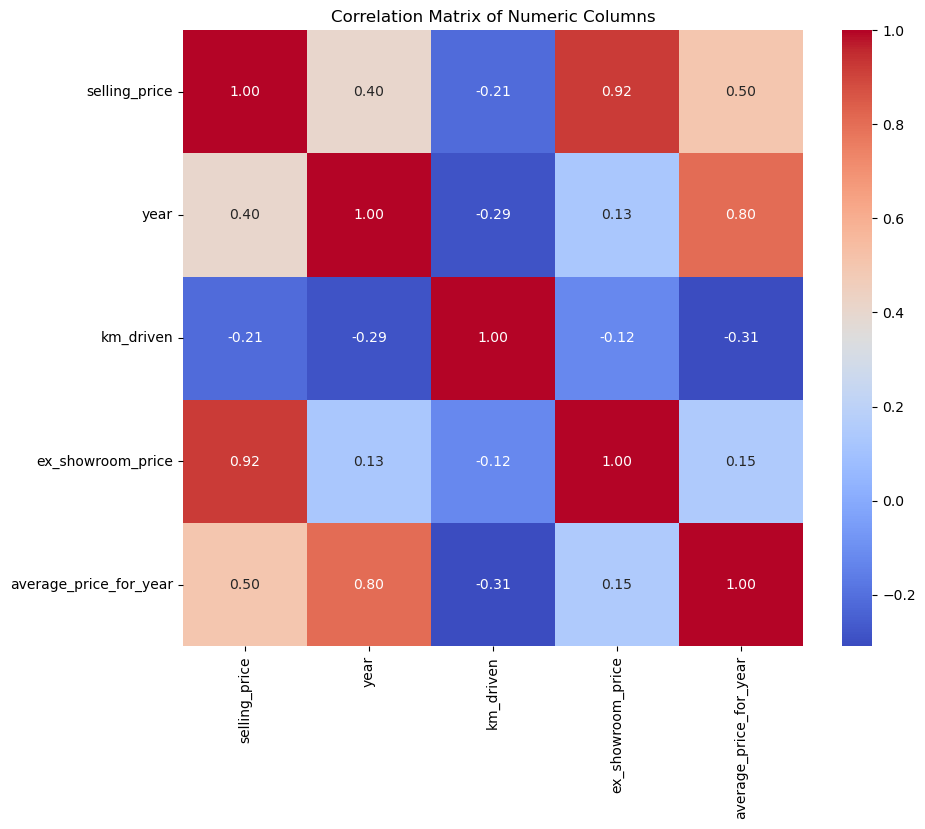

In [353]:
#Q15 Develop a correlation matrix for numeric columns and visualize it using a heatmap
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# **EDA-2**

In [370]:
cdata = pd.read_csv("https://raw.githubusercontent.com/chaitanya-0b10/Assignment-EDA/refs/heads/main/Car%20Sale.csv")

In [371]:
cdata.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [372]:
cdata.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


Average Selling Price by Dealer:
 Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.8

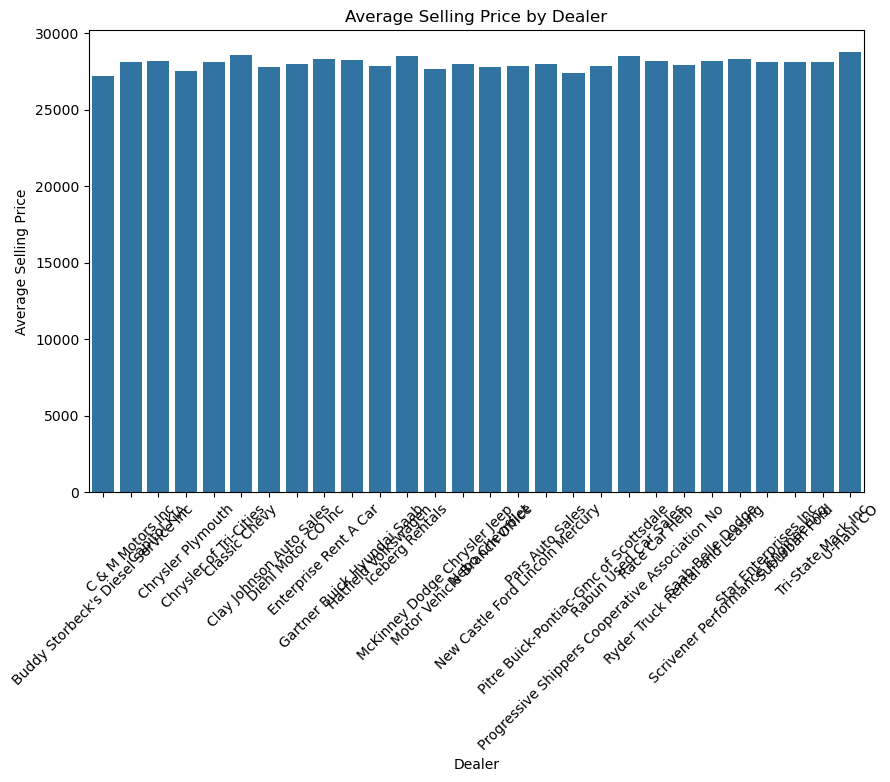

In [373]:
#Q1. What is the average selling price of cars for each dealer, and how does it compare across different dealers

average_selling_price_by_dealer = cdata.groupby('Dealer_Name')['Price ($)'].mean()

print("Average Selling Price by Dealer:\n", average_selling_price_by_dealer)

plt.figure(figsize=(10, 6))
sns.barplot(x=average_selling_price_by_dealer.index, y=average_selling_price_by_dealer.values)
plt.title('Average Selling Price by Dealer')
plt.xlabel('Dealer')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.show()

In [374]:
#Q2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends

price_variation_by_brand = cdata.groupby('Company')['Price ($)'].std()

highest_variation_brand = price_variation_by_brand.idxmax()
highest_variation_value = price_variation_by_brand.max()

print(f"The car brand with the highest price variation is {highest_variation_brand} with a standard deviation of {highest_variation_value}")

print("\nInterpretation:")
if highest_variation_value > 0 : 
  print(f"The high price variation for {highest_variation_brand} suggests a wide range of models or configurations available, leading to diverse pricing.")
  print(f"Customers might have more options to choose from within this brand, which could indicate the brand caters to diverse market segments or that pricing for this brand is more sensitive to options.")

else:
  print(f"There is no price variation for {highest_variation_brand}, this may indicate limited data for the brand or that the prices are fixed")

The car brand with the highest price variation is Lincoln with a standard deviation of 19658.050211265567

Interpretation:
The high price variation for Lincoln suggests a wide range of models or configurations available, leading to diverse pricing.
Customers might have more options to choose from within this brand, which could indicate the brand caters to diverse market segments or that pricing for this brand is more sensitive to options.


                count          mean           std     min      25%      50%  \
Transmission                                                                  
Auto          12571.0  28248.525972  13747.070597  1200.0  19000.0  24000.0   
Manual        11335.0  27914.710631  15862.871978  1700.0  17000.0  22001.0   

                  75%      max  
Transmission                    
Auto          35500.0  75700.0  
Manual        34000.0  85800.0  


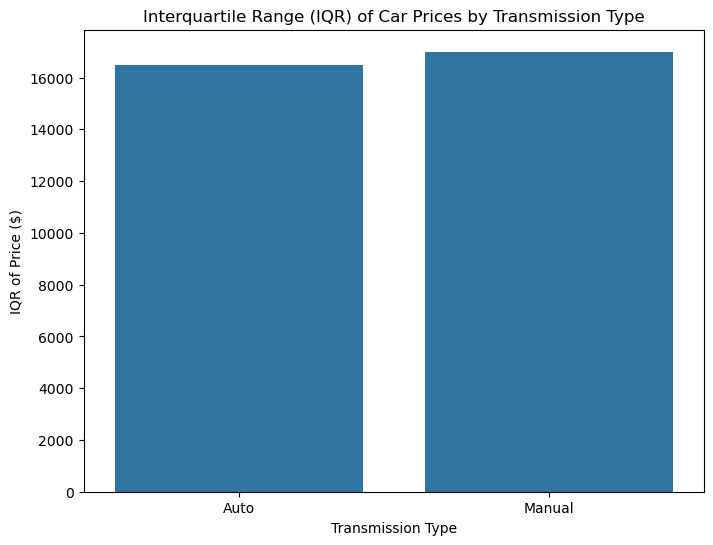

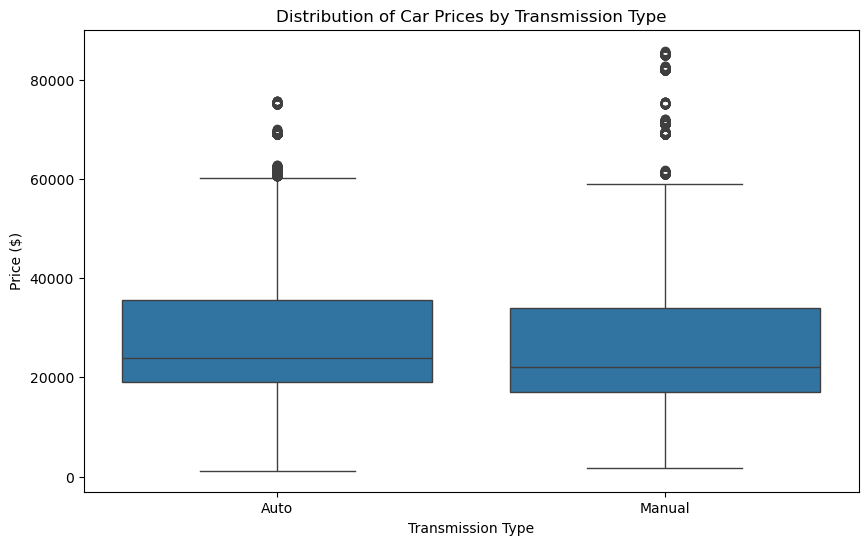

In [375]:
#Q3.  What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare

price_stats_by_transmission = cdata.groupby('Transmission')['Price ($)'].describe()
print(price_stats_by_transmission)

transmission_types = price_stats_by_transmission.index
q1_prices = price_stats_by_transmission['25%']
q3_prices = price_stats_by_transmission['75%']
iqr_prices = q3_prices - q1_prices

plt.figure(figsize=(8, 6))
sns.barplot(x=transmission_types, y=iqr_prices)
plt.title('Interquartile Range (IQR) of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('IQR of Price ($)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=cdata)
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.show()

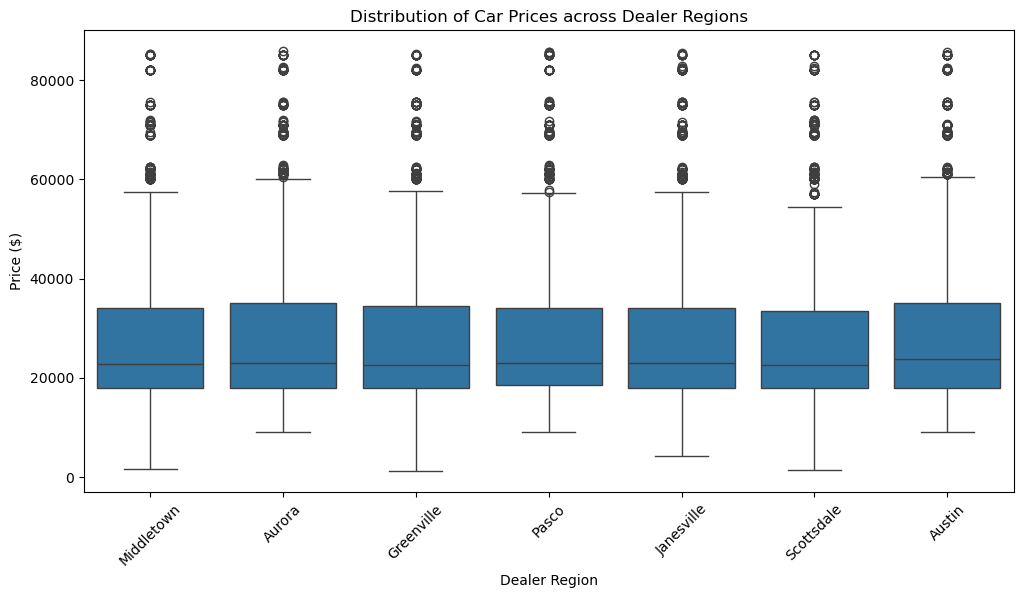

In [376]:
#Q4. What is the distribution of car prices across different Region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=cdata)
plt.title('Distribution of Car Prices across Dealer Regions')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


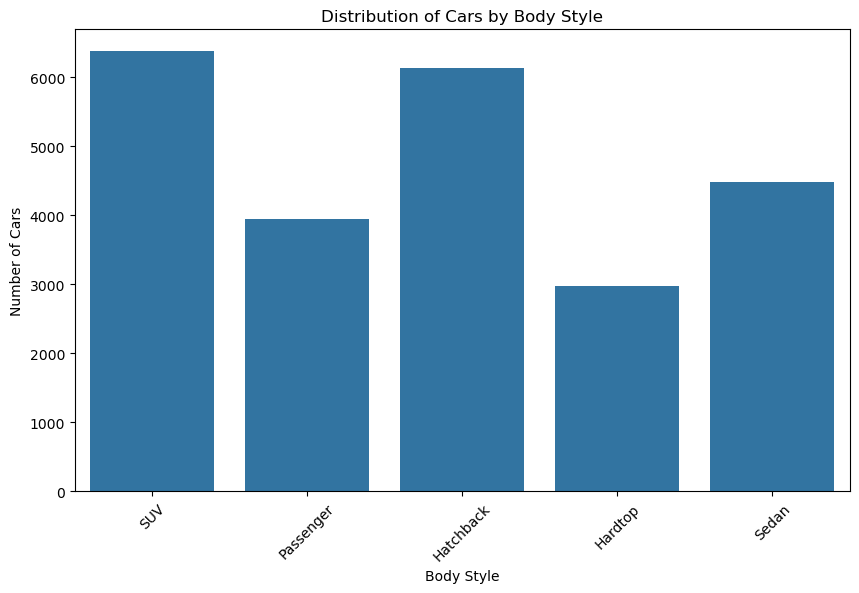

In [377]:
# Q5. What is the distribution of cars based on Body Style
body_style_counts = cdata['Body Style'].value_counts()
print(body_style_counts)

plt.figure(figsize=(10, 6))
sns.countplot(x='Body Style', data=cdata)
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

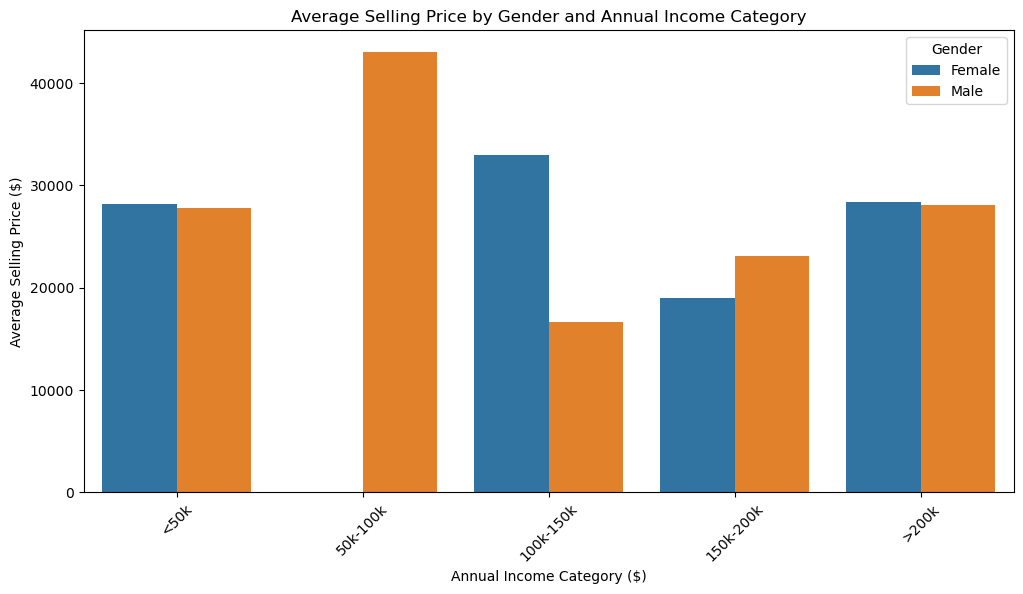

In [378]:
# Q6. How does the average selling price of cars vary by customer gender and annual income
income_bins = [0, 50000, 100000, 150000, 200000, float('inf')]
income_labels = ['<50k', '50k-100k', '100k-150k', '150k-200k', '>200k']

cdata['Income_Category'] = pd.cut(cdata['Annual Income'], bins=income_bins, labels=income_labels)

average_price_by_gender_income = cdata.groupby(['Gender', 'Income_Category'])['Price ($)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Income_Category', y='Price ($)', hue='Gender', data=average_price_by_gender_income)
plt.title('Average Selling Price by Gender and Annual Income Category')
plt.xlabel('Annual Income Category ($)')
plt.ylabel('Average Selling Price ($)')
plt.xticks(rotation=45)
plt.show()

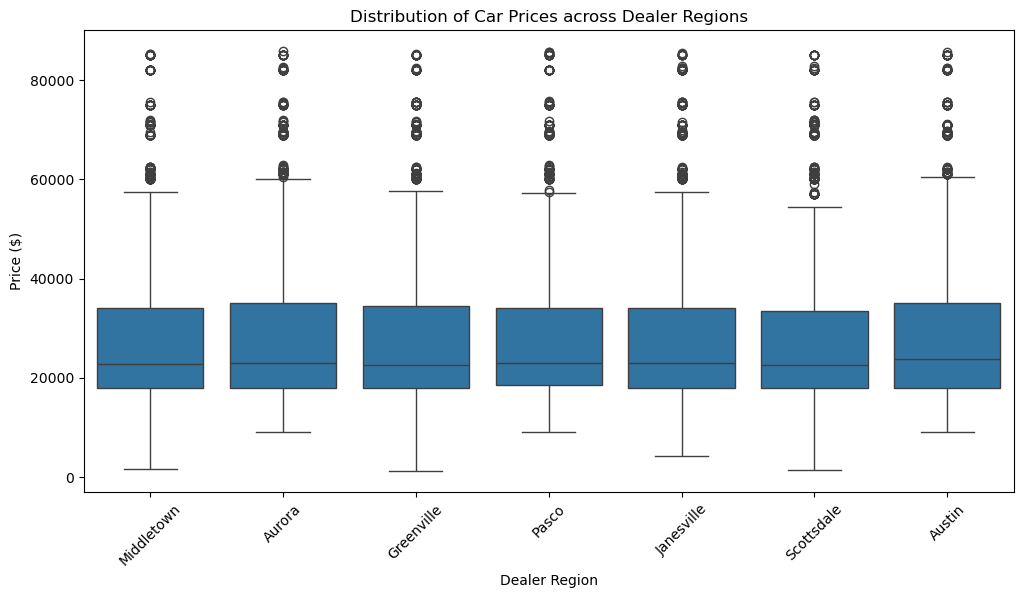


Number of cars sold by region:
 Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Middletown    3128
Greenville    3128
Name: count, dtype: int64


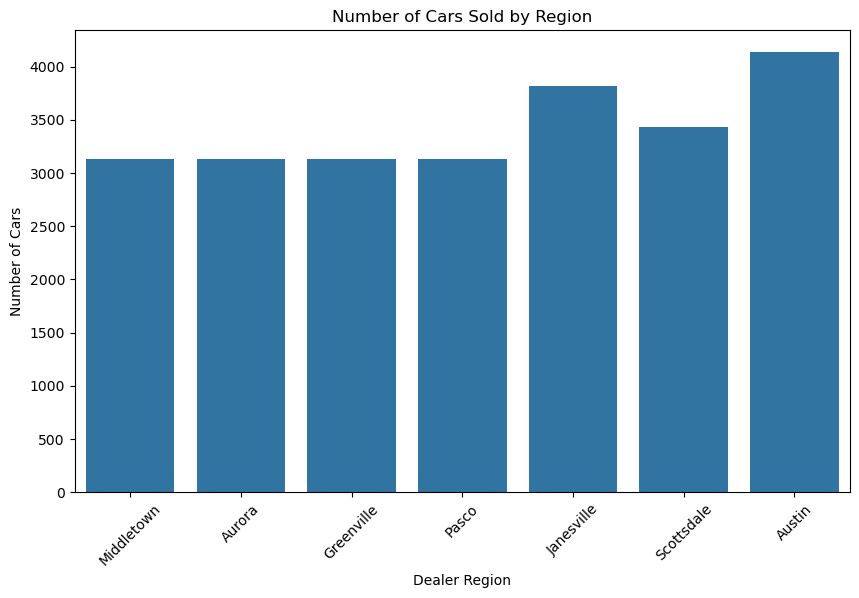

In [382]:
#Q7  What is the distribution of car prices by region, and how does the number of cars sold vary by region

plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=cdata)
plt.title('Distribution of Car Prices across Dealer Regions')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

car_counts_by_region = cdata['Dealer_Region'].value_counts()
print("\nNumber of cars sold by region:\n", car_counts_by_region)

plt.figure(figsize=(10, 6))
sns.countplot(x='Dealer_Region', data=cdata)
plt.title('Number of Cars Sold by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


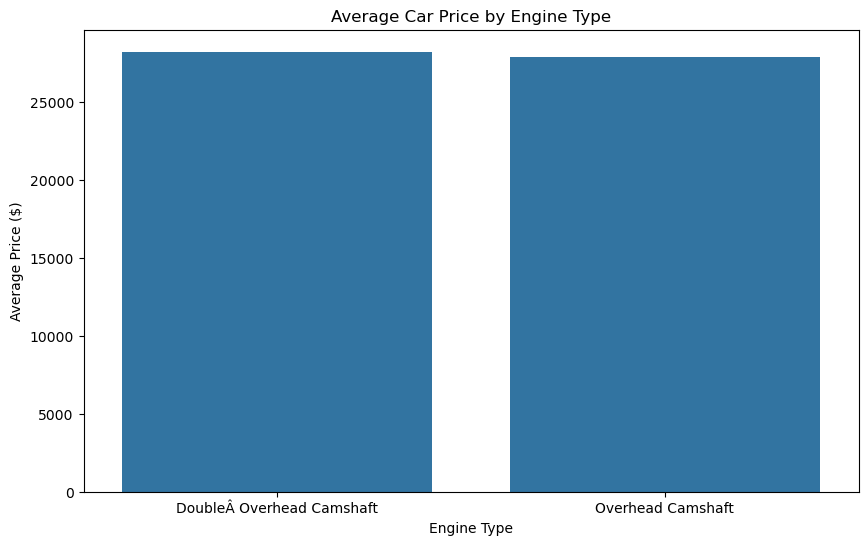

In [385]:
#Q8. How does the average car price differ between different engine

average_price_by_engine = cdata.groupby('Engine')['Price ($)'].mean()

print(average_price_by_engine)
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_engine.index, y=average_price_by_engine.values)
plt.title('Average Car Price by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Average Price ($)')
plt.show()

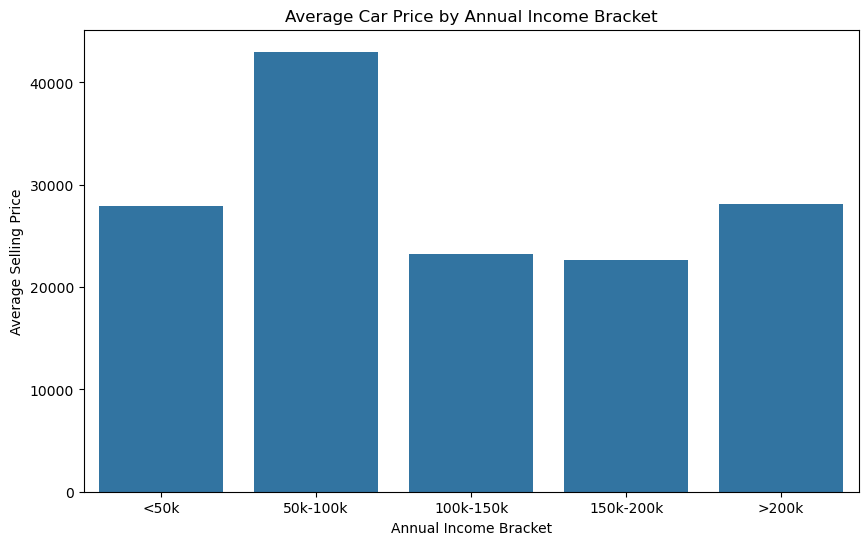

In [387]:
#Q9.  How do car prices vary based on the customer’s annual only income bracket

income_bins = [0, 50000, 100000, 150000, 200000, float('inf')]
income_labels = ['<50k', '50k-100k', '100k-150k', '150k-200k', '>200k']
cdata['Income_Category'] = pd.cut(cdata['Annual Income'], bins=income_bins, labels=income_labels)

average_price_by_income = cdata.groupby('Income_Category')['Price ($)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Income_Category', y='Price ($)', data=average_price_by_income)
plt.title('Average Car Price by Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Selling Price')
plt.show()

Top 5 Car Models with Highest Sales:
Model
LS400            14263424
Jetta            12287736
Silhouette       12271849
Montero Sport    11472231
Ram Pickup       10655391
Name: Price ($), dtype: int64


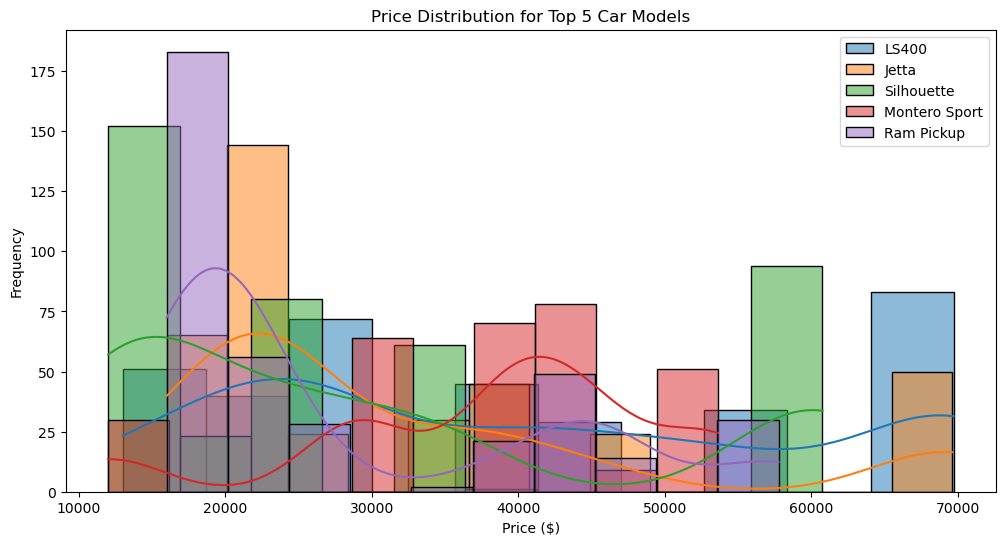

In [390]:
#Q10.  What are the top 5 car models with the highest number of sales, and how does their price distribution look

sales_by_model = cdata.groupby('Model')['Price ($)'].sum()

top_5_models = sales_by_model.nlargest(5)

print("Top 5 Car Models with Highest Sales:")
print(top_5_models)


plt.figure(figsize=(12, 6))
for model in top_5_models.index:
    sns.histplot(cdata[cdata['Model'] == model]['Price ($)'], label=model, kde=True)

plt.title('Price Distribution for Top 5 Car Models')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

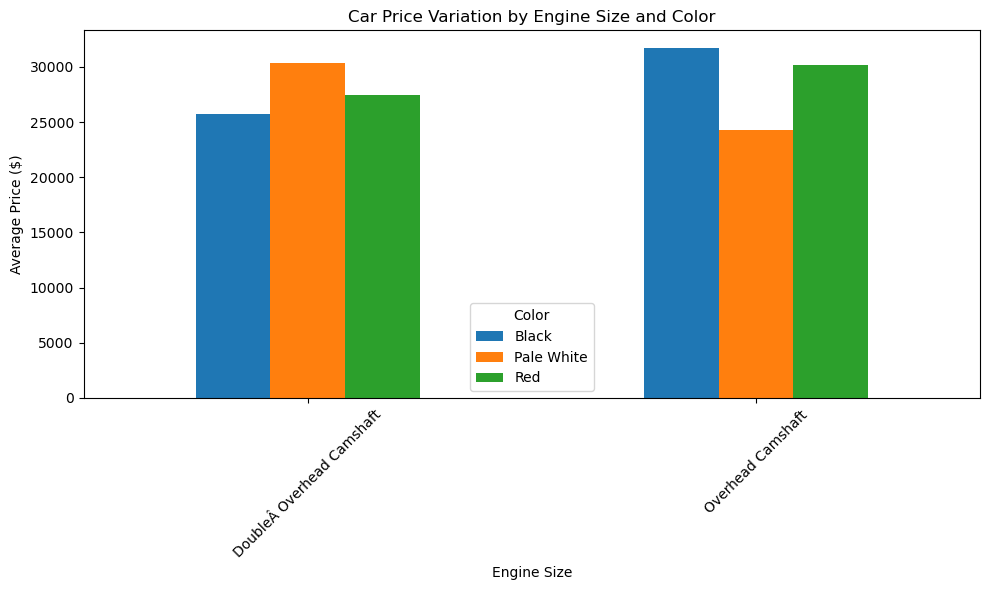


Colors with the highest price variation:
Color
Black         84600
Red           81150
Pale White    78600
Name: Price ($), dtype: int64


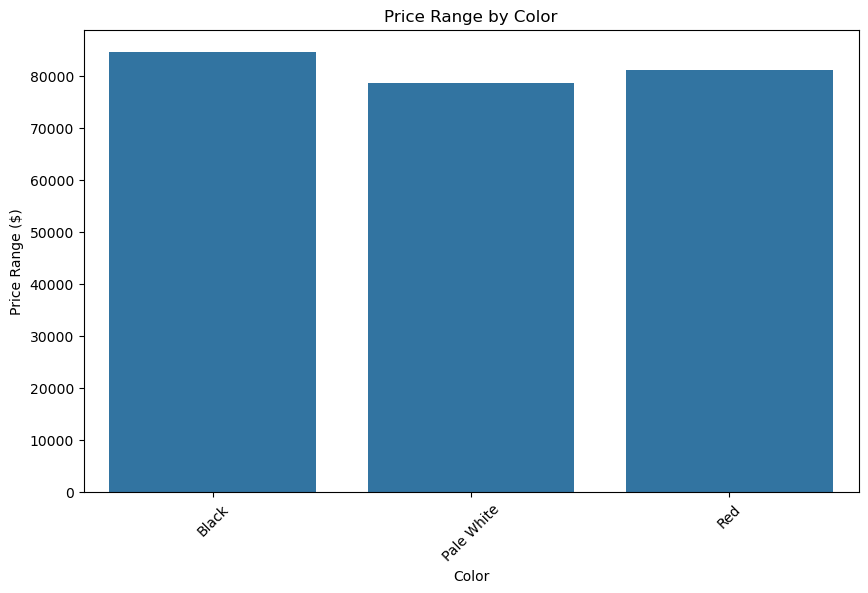

In [392]:
#Q11.  How does car price vary with engine size across different car colors, and which colors have the highest price variation
price_variation = cdata.groupby(['Engine', 'Color'])['Price ($)'].mean().unstack()

price_variation.plot(kind='bar', figsize=(10, 6))
plt.title('Car Price Variation by Engine Size and Color')
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Color')
plt.tight_layout()
plt.show()

price_range_by_color = cdata.groupby('Color')['Price ($)'].agg(lambda x: x.max() - x.min())

highest_variation_colors = price_range_by_color.nlargest(5) # Get top 5

print("\nColors with the highest price variation:")
print(highest_variation_colors)

plt.figure(figsize=(10, 6))
sns.barplot(x=price_range_by_color.index, y=price_range_by_color.values)
plt.title('Price Range by Color')
plt.xlabel('Color')
plt.ylabel('Price Range ($)')
plt.xticks(rotation=45)
plt.show()

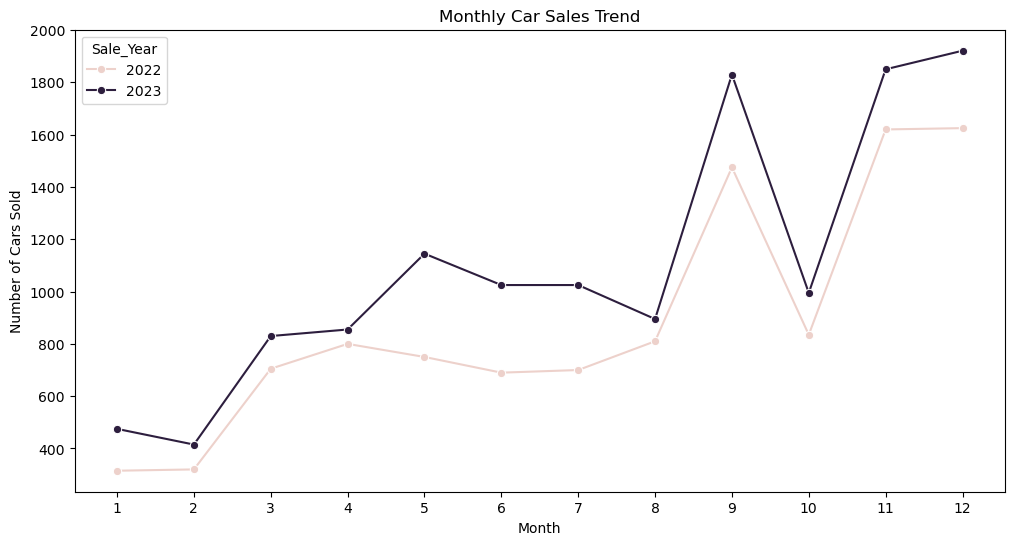

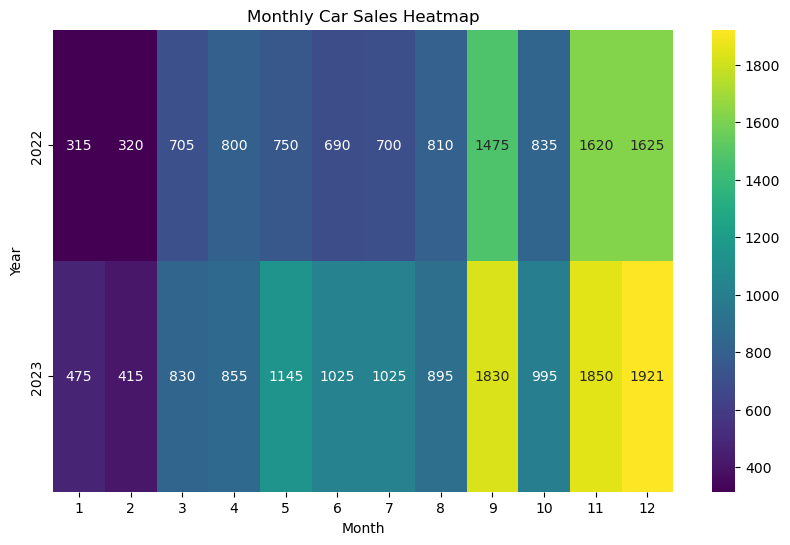

In [394]:
#Q12. Is there any seasonal trend in car sales based on the date of sale

cdata['Date'] = pd.to_datetime(cdata['Date'])

cdata['Sale_Month'] = cdata['Date'].dt.month
cdata['Sale_Year'] = cdata['Date'].dt.year

monthly_sales = cdata.groupby(['Sale_Year', 'Sale_Month'])['Price ($)'].count().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Sale_Month', y='Price ($)', hue='Sale_Year', data=monthly_sales, marker='o')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(range(1, 13))
plt.show()

sales_pivot = monthly_sales.pivot(index='Sale_Year', columns='Sale_Month', values='Price ($)').fillna(0)  # Fill missing months with 0 for a complete heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sales_pivot, annot=True, fmt='.0f', cmap='viridis')
plt.title('Monthly Car Sales Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

                          count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15440.056434  11000.0  19001.0   

                           

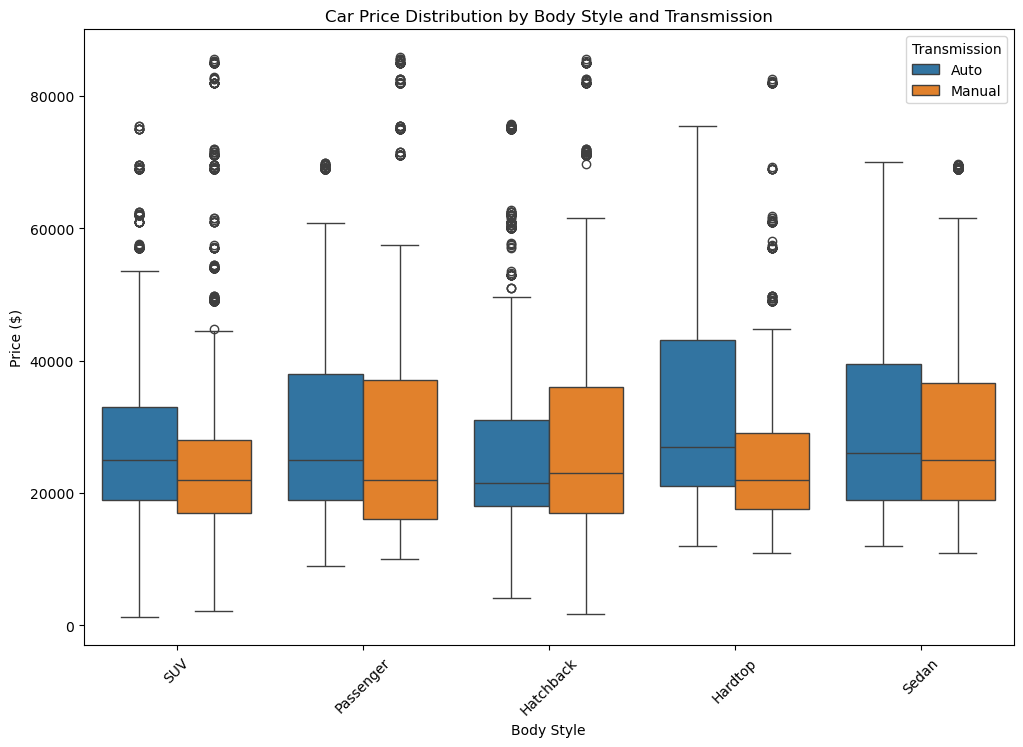

In [396]:
#Q13.  How does the car price distribution change when considering different combinations of body style and transmission type


price_stats = cdata.groupby(['Body Style', 'Transmission'])['Price ($)'].describe()

print(price_stats)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=cdata)
plt.title('Car Price Distribution by Body Style and Transmission')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

Correlation Matrix:
                Price ($)  Engine_Numeric  Annual Income
Price ($)        1.000000             NaN       0.012065
Engine_Numeric        NaN             NaN            NaN
Annual Income    0.012065             NaN       1.000000


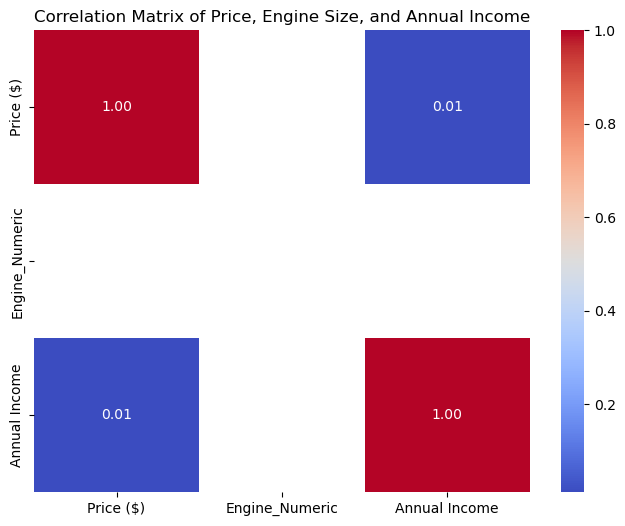

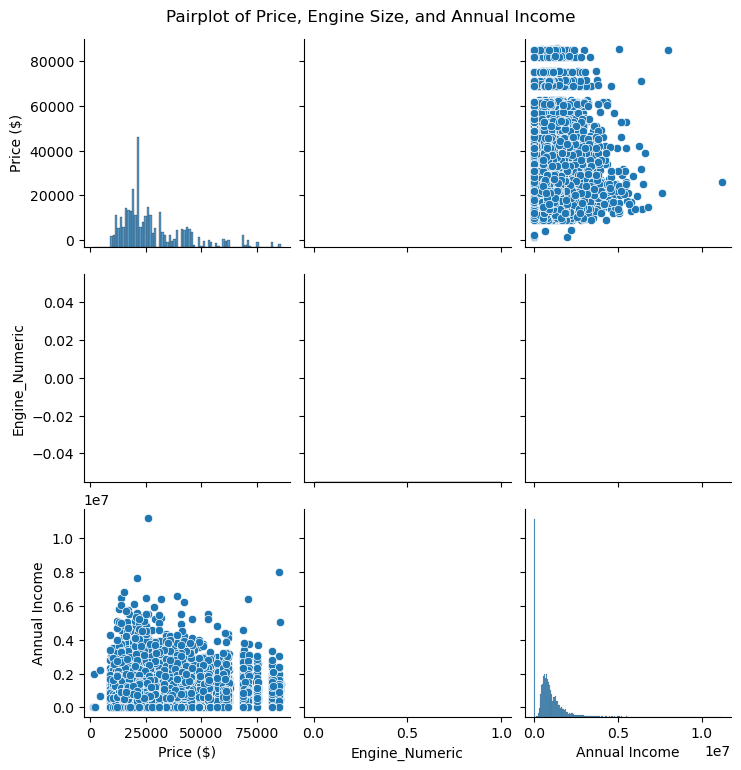

In [398]:
#Q14.  What is the correlation between car price, engine size, and annual income of customers, and how do these features interact

cdata['Engine_Numeric'] = pd.to_numeric(cdata['Engine'], errors='coerce') # Convert to numeric, handle errors

correlation_matrix = cdata[['Price ($)', 'Engine_Numeric', 'Annual Income']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Price, Engine Size, and Annual Income')
plt.show()

sns.pairplot(cdata[['Price ($)', 'Engine_Numeric', 'Annual Income']]) 
plt.suptitle('Pairplot of Price, Engine Size, and Annual Income', y=1.02)
plt.show()


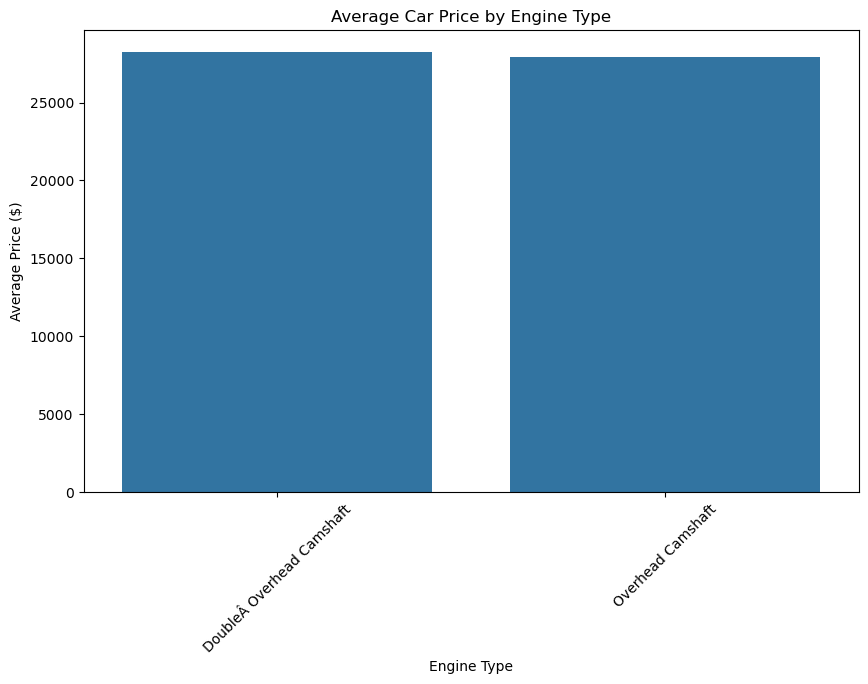

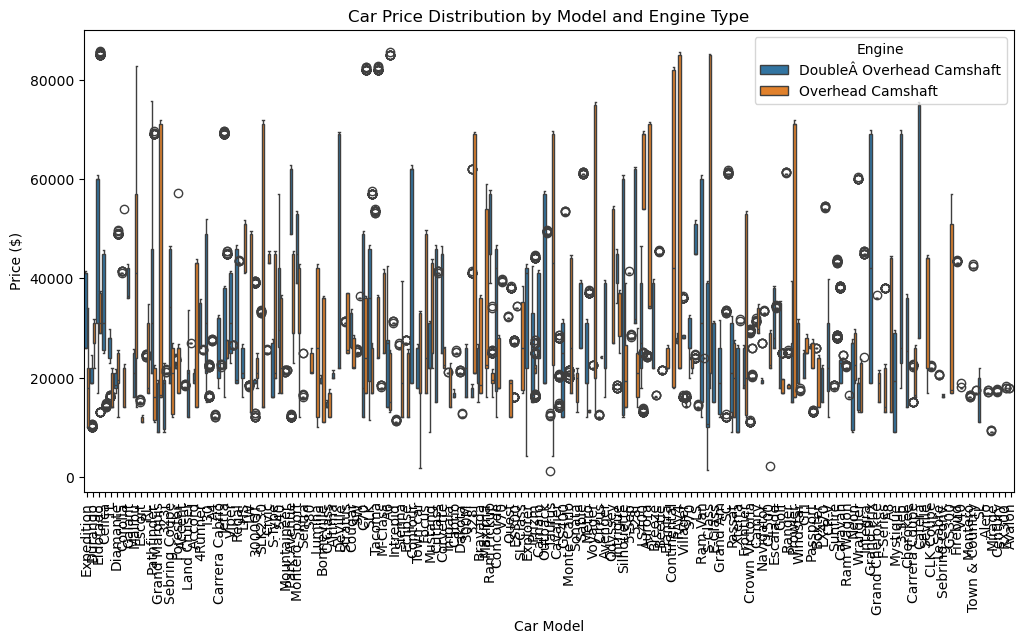

In [400]:
#Q15. How does the average car price vary across different car models and engine types?

average_price_by_engine = cdata.groupby('Engine')['Price ($)'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_engine.index, y=average_price_by_engine.values)
plt.title('Average Car Price by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Price ($)', hue='Engine', data=cdata)
plt.title('Car Price Distribution by Model and Engine Type')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=90)
plt.show()

# **EDA-3**

In [409]:
Azdata = pd.read_csv("https://raw.githubusercontent.com/chaitanya-0b10/Assignment-EDA/refs/heads/main/amazon.csv")

In [410]:
Azdata.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [412]:
Azdata.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [413]:
#Q1
Azdata['rating'] = pd.to_numeric(Azdata['rating'], errors='coerce')

average_rating_by_category = Azdata.groupby('category')['rating'].mean()

print(average_rating_by_category)


category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

In [414]:
#Q2
df_sorted = Azdata.sort_values(by=['category', 'rating_count'], ascending=[True, False])

top_products_by_category = df_sorted.groupby('category').head(5)

print(top_products_by_category[['category', 'product_name', 'rating_count']])


                                               category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
742   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
772   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
858   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
919   OfficeProducts|OfficePaperProducts|Paper|Stati...   
955   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1,118  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4,426  
742   Kanget [2 Pack] Type C Female to USB A Male Ch...        1,540  
906   H

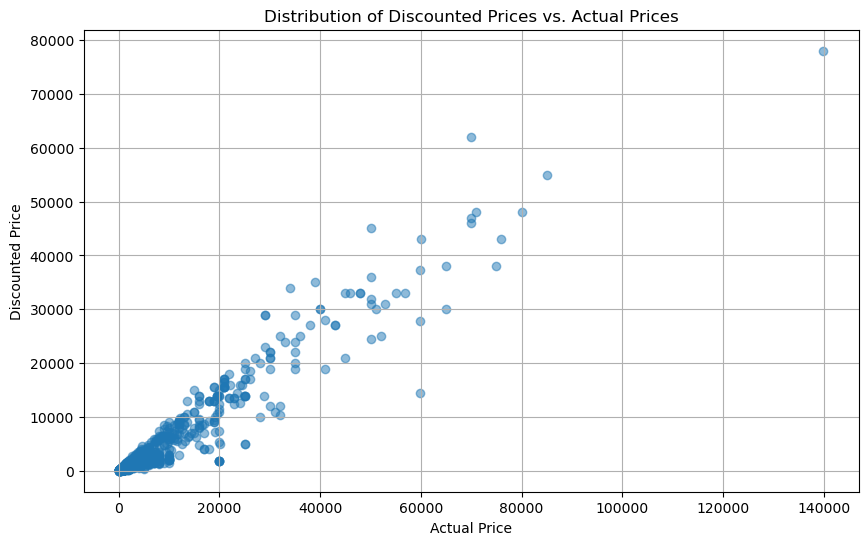

In [415]:
#Q3
import matplotlib.pyplot as plt

Azdata['actual_price'] = Azdata['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
Azdata['discounted_price'] = Azdata['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)

plt.figure(figsize=(10, 6))
plt.scatter(Azdata['actual_price'], Azdata['discounted_price'], alpha=0.5)
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.grid(True)
plt.show()


In [416]:
#Q4
Azdata['discount_percentage'] = ((Azdata['actual_price'] - Azdata['discounted_price']) / Azdata['actual_price']) * 100

average_discount_by_category = Azdata.groupby('category')['discount_percentage'].mean()

print(average_discount_by_category)


category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    41.525000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.387733
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.035035
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.335120
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.719582
                                                                                                                            ...    
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.000000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&Wr

In [417]:
#Q5
most_popular_products = Azdata.sort_values(by='rating_count', ascending=False)

top_products = most_popular_products[['product_name', 'rating_count']].head(10)

print(top_products)


                                           product_name rating_count
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...          992
750        Eveready Red 1012 AAA Batteries - Pack of 10          989
977   Sennheiser CX 80S in-Ear Wired Headphones with...       98,250
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...          976
151   Zoul USB Type C Fast Charging 3A Nylon Braided...          974
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...          974
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...          974
536   boAt Rockerz 400 Bluetooth On Ear Headphones W...       97,175
918   boAt Rockerz 400 Bluetooth On Ear Headphones W...       97,174
1165  Kitchenwell 18Pc Plastic Food Snack Bag Pouch ...           97


In [418]:
#Q6
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

text_data = Azdata['about_product'].astype(str) + ' ' + Azdata['review_content'].astype(str)

stop_words = set(stopwords.words('english'))
tokens = word_tokenize(' '.join(text_data))
filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]

keyword_counts = Counter(filtered_tokens)

most_common_keywords = keyword_counts.most_common(10)

print(most_common_keywords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CHAITANYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CHAITANYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('good', 6115), ('product', 4038), ('quality', 2564), ('cable', 2149), ('use', 2066), ('charging', 1569), ('one', 1563), ('like', 1407), ('also', 1399), ('usb', 1388)]


In [421]:
most_popular_reviews = Azdata.sort_values(by='rating_count', ascending=False)

top_reviews = most_popular_reviews[['review_title', 'review_content', 'rating_count']].head(10)

print(top_reviews)


                                           review_title  \
1279  Decent product,doesn't pick up sand,Ok ok,Must...   
750   Nice .,very good batteries received,Longtevity...   
977   A Quality Sound-Signature but leaves craving f...   
1059  Kettle is good but bottle is not good quality,...   
151   Great Cable, Charging Speeds Could Be Better,G...   
32    Great Cable, Charging Speeds Could Be Better,G...   
823   Great Cable, Charging Speeds Could Be Better,G...   
536   Worth Every Square Inch.,VFM, Plastic build. M...   
918   Worth Every Square Inch.,VFM, Plastic build. M...   
1165  Good clips.,Second quality,Value for money.,No...   

                                         review_content rating_count  
1279  Does the job well,doesn't work on sand. though...          992  
750   Nive,very good batteries received,Like,Good pr...          989  
977   For those looking for a genuine review & a bri...       98,250  
1059  Bottle quality is not good.,Best for hot water...          9

In [428]:
#Q7
most_popular_reviews = Azdata.sort_values(by='rating_count', ascending=False)

top_reviews = most_popular_reviews[['review_title', 'review_content', 'rating_count']].head(10)

print(top_reviews)


                                           review_title  \
1279  Decent product,doesn't pick up sand,Ok ok,Must...   
750   Nice .,very good batteries received,Longtevity...   
977   A Quality Sound-Signature but leaves craving f...   
1059  Kettle is good but bottle is not good quality,...   
151   Great Cable, Charging Speeds Could Be Better,G...   
32    Great Cable, Charging Speeds Could Be Better,G...   
823   Great Cable, Charging Speeds Could Be Better,G...   
536   Worth Every Square Inch.,VFM, Plastic build. M...   
918   Worth Every Square Inch.,VFM, Plastic build. M...   
1165  Good clips.,Second quality,Value for money.,No...   

                                         review_content rating_count  
1279  Does the job well,doesn't work on sand. though...          992  
750   Nive,very good batteries received,Like,Good pr...          989  
977   For those looking for a genuine review & a bri...       98,250  
1059  Bottle quality is not good.,Best for hot water...          9

In [432]:
#Q8
Azdata['actual_price'] = Azdata['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
Azdata['discounted_price'] = Azdata['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)

correlation = Azdata['discounted_price'].corr(Azdata['rating'])

print(f"The correlation between discounted price and rating is: {correlation}")


The correlation between discounted price and rating is: 0.12033741712288537


In [434]:
#Q9
Azdata['rating'] = pd.to_numeric(Azdata['rating'], errors='coerce')

average_rating_by_category = Azdata.groupby('category')['rating'].mean()

top_5_categories = average_rating_by_category.sort_values(ascending=False).head(5)

print(top_5_categories)


category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64


In [436]:
#Q10
"""Discount Strategy: Optimize discounts to improve customer satisfaction and sales.

Price Sensitivity: Identify optimal price points to attract more customers.

Product Quality: Focus on improving low-rated categories.

High-Rating Products: Promote high-rated products to attract more customers.

Review Analysis: Use customer feedback to improve products and services.

Keyword Optimization: Enhance product listings for better search visibility.

Targeted Marketing: Create campaigns based on top-rated categories and products.

Customer Engagement: Encourage more reviews and ratings.

Demand Forecasting: Manage inventory based on high-demand products.

Product Lifecycle Management: Improve or phase out declining products."""

'Discount Strategy: Optimize discounts to improve customer satisfaction and sales.\n\nPrice Sensitivity: Identify optimal price points to attract more customers.\n\nProduct Quality: Focus on improving low-rated categories.\n\nHigh-Rating Products: Promote high-rated products to attract more customers.\n\nReview Analysis: Use customer feedback to improve products and services.\n\nKeyword Optimization: Enhance product listings for better search visibility.\n\nTargeted Marketing: Create campaigns based on top-rated categories and products.\n\nCustomer Engagement: Encourage more reviews and ratings.\n\nDemand Forecasting: Manage inventory based on high-demand products.\n\nProduct Lifecycle Management: Improve or phase out declining products.'

# **EDA - 4**

In [445]:
spdf= pd.read_csv("https://raw.githubusercontent.com/chaitanya-0b10/Assignment-EDA/refs/heads/main/spotify.csv")

In [447]:
spdf.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [449]:
spdf.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [451]:
#Q1
null_values = spdf.isnull().sum()
print("Null values in each column:\n", null_values)

spdf = spdf.fillna('Unknown')  

duplicate_rows = spdf.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

spdf = spdf.drop_duplicates()

print(spdf)

Null values in each column:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of duplicate rows: 27
             Artist                                         Track Name  \
0             Drake            Rich Baby Daddy (feat. Sexyy Red & SZA)   
1             Drake                                          One Dance   
2             Drake                                 IDGAF (feat. Yeat)   
3             Drake               First Person Shooter (feat. J. Cole)   
4             Drake                      Jimmy Cooks (feat. 21 Savage)   
..              ...                                                ...   
433  French Montana                                       Stand United   
434    Jason Derulo                     Tip Toe (feat. French Montana)   
436         Fat Joe                     All The Way Up (feat. Infared)   
437       A$AP Ferg  Work REMIX (feat. A$AP Rocky, French Montana, ...   
438           Diddy 

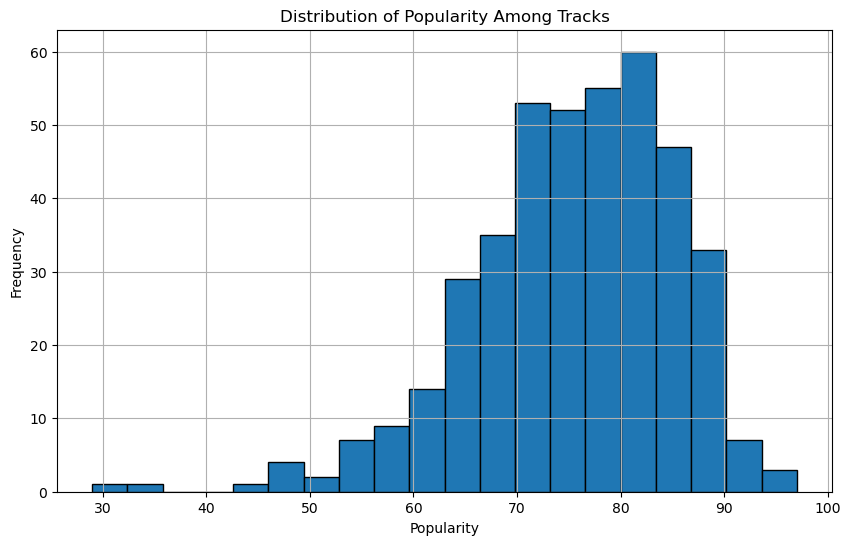

In [453]:
#Q2
plt.figure(figsize=(10, 6))
plt.hist(spdf['Popularity'], bins=20, edgecolor='black')
plt.title('Distribution of Popularity Among Tracks')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


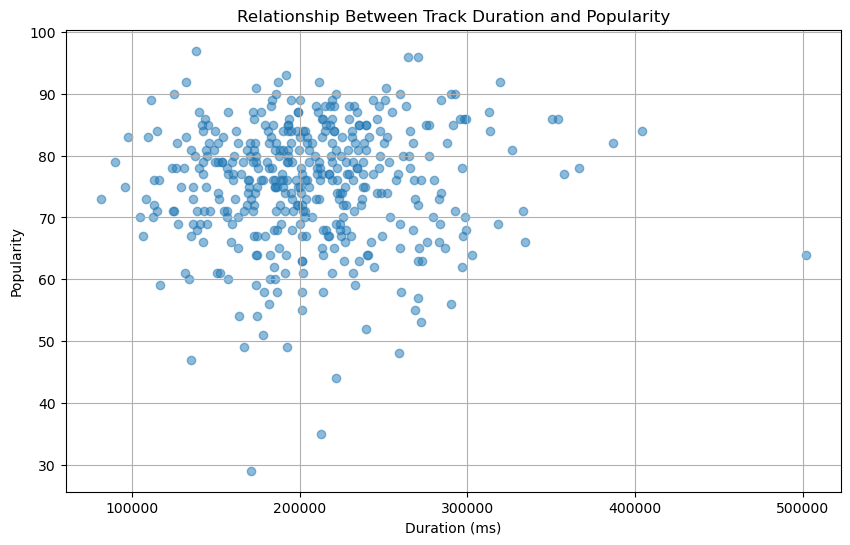

In [455]:
#Q3
plt.figure(figsize=(10, 6))
plt.scatter(spdf['Duration (ms)'], spdf['Popularity'], alpha=0.5)
plt.title('Relationship Between Track Duration and Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()


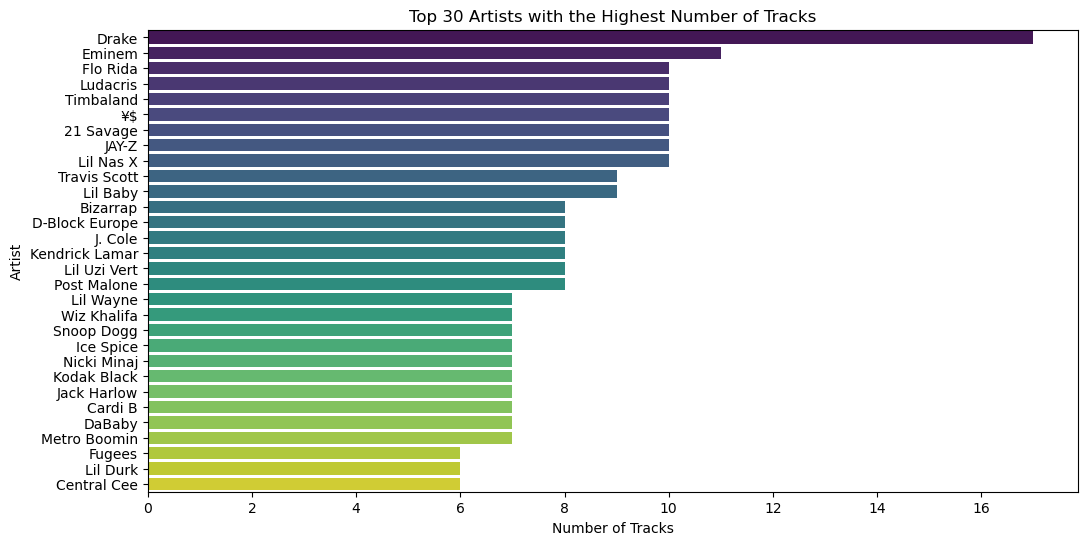

In [457]:
#Q4

track_counts = spdf['Artist'].value_counts().head(30)

plt.figure(figsize=(12, 6))
sns.barplot(y=track_counts.index, x=track_counts.values, palette='viridis')
plt.title('Top 30 Artists with the Highest Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()


In [459]:
#Q5
least_popular_tracks = spdf.sort_values(by='Popularity', ascending=True).head(5)

top_5_least_popular_tracks = least_popular_tracks[['Artist', 'Track Name', 'Popularity']]

print(top_5_least_popular_tracks)


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [461]:
#Q6
track_counts = spdf['Artist'].value_counts().head(5)

average_popularity = spdf[spdf['Artist'].isin(track_counts.index)].groupby('Artist')['Popularity'].mean()

print("Top 5 Artists with the Highest Number of Tracks and Their Average Popularity:")
print(average_popularity)


Top 5 Artists with the Highest Number of Tracks and Their Average Popularity:
Artist
Drake        82.882353
Eminem       83.636364
Flo Rida     78.000000
Ludacris     63.000000
Timbaland    69.000000
Name: Popularity, dtype: float64


In [463]:
#Q7

top_5_artists = spdf['Artist'].value_counts().head(5).index

most_popular_tracks = []

for artist in top_5_artists:
  
    artist_tracks = spdf[spdf['Artist'] == artist]
    
    most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]
  
    most_popular_tracks.append({'Artist': artist, 'Track Name': most_popular_track['Track Name']})

most_popular_tracks_df = pd.DataFrame(most_popular_tracks)

print(most_popular_tracks_df)


      Artist                               Track Name
0      Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)
1     Eminem                               Without Me
2   Flo Rida                       Low (feat. T-Pain)
3   Ludacris                             My Chick Bad
4  Timbaland                            The Way I Are


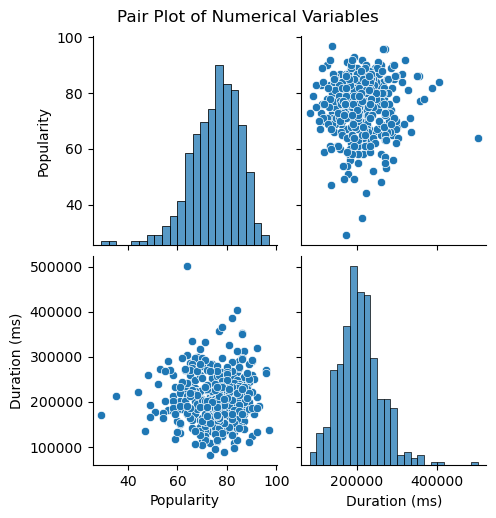

In [465]:
#Q8

numerical_columns = ['Popularity', 'Duration (ms)']

sns.pairplot(spdf[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


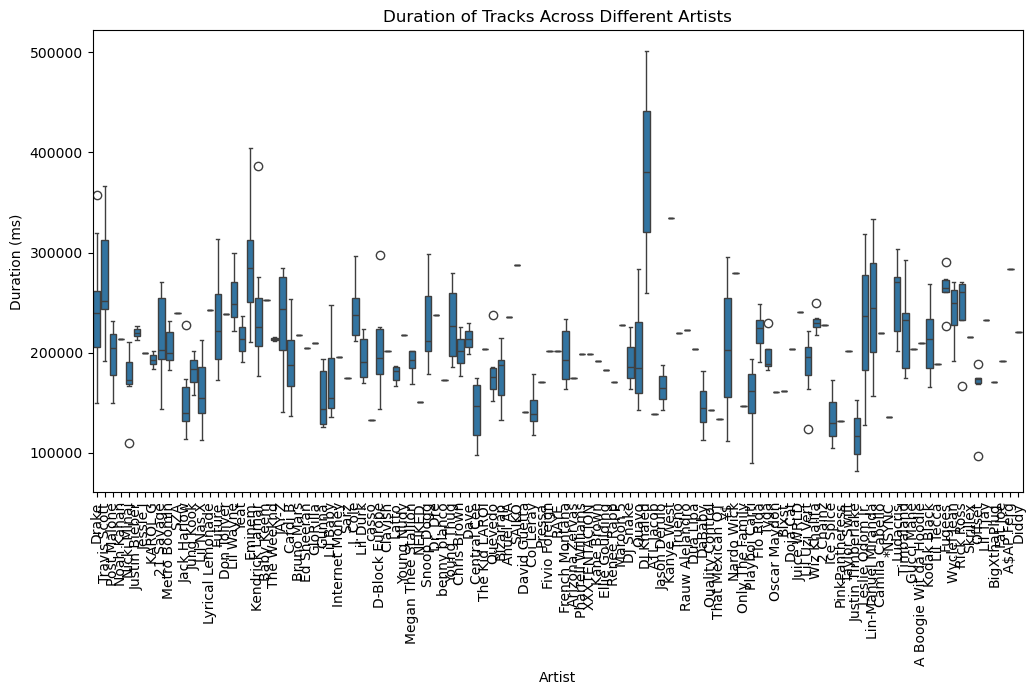

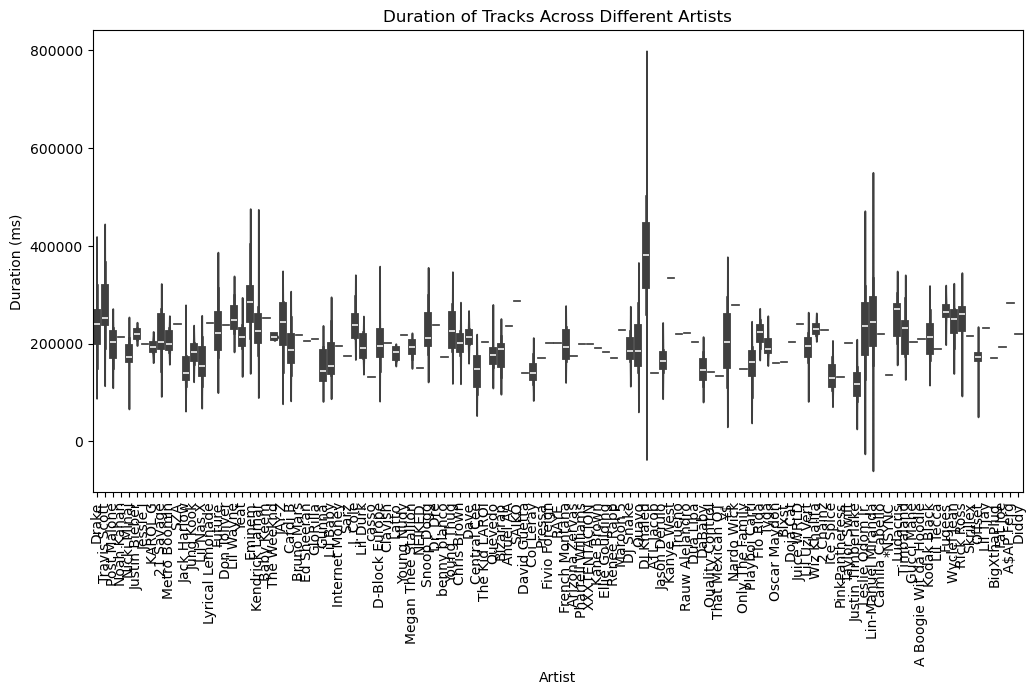

In [305]:
#Q9

plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=spdf)
plt.title('Duration of Tracks Across Different Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Duration (ms)', data=spdf)
plt.title('Duration of Tracks Across Different Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=90)
plt.show()


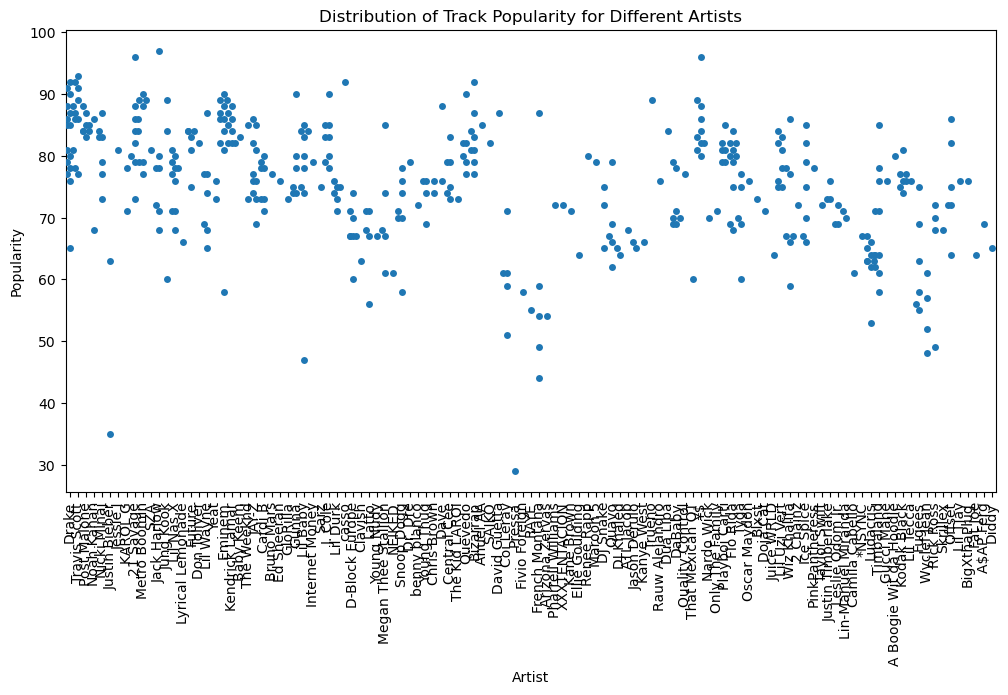

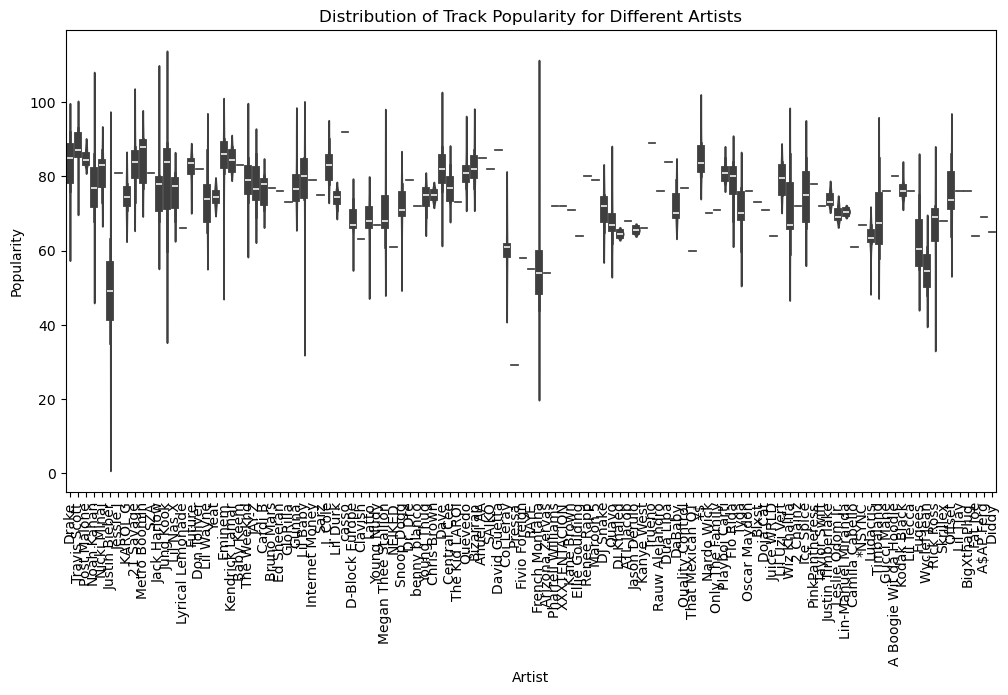

In [307]:
#Q10
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Artist', y='Popularity', data=spdf)
plt.title('Distribution of Track Popularity for Different Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity', data=spdf)
plt.title('Distribution of Track Popularity for Different Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()
